<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

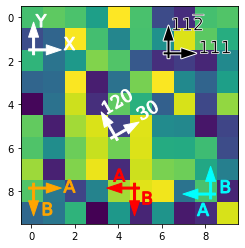

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredDirectionArrows
import matplotlib.font_manager as fm


# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()
ax.imshow(np.random.random((10, 10)))

# Simple example
simple_arrow = AnchoredDirectionArrows(ax.transAxes, 'X', 'Y')
ax.add_artist(simple_arrow)

# High contrast arrow
high_contrast_part_1 = AnchoredDirectionArrows(
                            ax.transAxes,
                            '111', r'11$\overline{2}$',
                            loc='upper right',
                            arrow_props={'ec': 'w', 'fc': 'none', 'alpha': 1,
                                         'lw': 2}
                            )
ax.add_artist(high_contrast_part_1)

high_contrast_part_2 = AnchoredDirectionArrows(
                            ax.transAxes,
                            '111', r'11$\overline{2}$',
                            loc='upper right',
                            arrow_props={'ec': 'none', 'fc': 'k'},
                            text_props={'ec': 'w', 'fc': 'k', 'lw': 0.4}
                            )
ax.add_artist(high_contrast_part_2)

# Rotated arrow
fontprops = fm.FontProperties(family='serif')

roatated_arrow = AnchoredDirectionArrows(
                    ax.transAxes,
                    '30', '120',
                    loc='center',
                    color='w',
                    angle=30,
                    fontproperties=fontprops
                    )
ax.add_artist(roatated_arrow)

# Altering arrow directions
a1 = AnchoredDirectionArrows(
        ax.transAxes, 'A', 'B', loc='lower center',
        length=-0.15,
        sep_x=0.03, sep_y=0.03,
        color='r'
    )
ax.add_artist(a1)

a2 = AnchoredDirectionArrows(
        ax.transAxes, 'A', ' B', loc='lower left',
        aspect_ratio=-1,
        sep_x=0.01, sep_y=-0.02,
        color='orange'
        )
ax.add_artist(a2)


a3 = AnchoredDirectionArrows(
        ax.transAxes, ' A', 'B', loc='lower right',
        length=-0.15,
        aspect_ratio=-1,
        sep_y=-0.1, sep_x=0.04,
        color='cyan'
        )
ax.add_artist(a3)

plt.show()

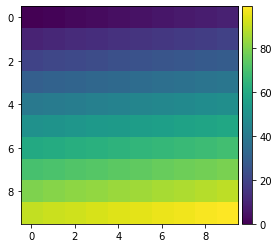

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

ax = plt.subplot()
im = ax.imshow(np.arange(100).reshape((10, 10)))

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

plt.show()

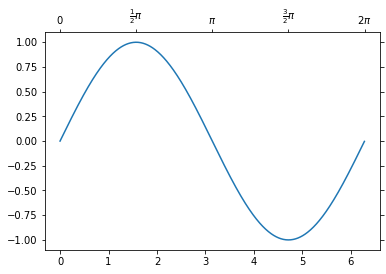

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import numpy as np

ax = host_subplot(111)
xx = np.arange(0, 2*np.pi, 0.01)
ax.plot(xx, np.sin(xx))

ax2 = ax.twin()  # ax2 is responsible for "top" axis and "right" axis
ax2.set_xticks([0., .5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
ax2.set_xticklabels(["$0$", r"$\frac{1}{2}\pi$",
                     r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$"])

ax2.axis["right"].major_ticklabels.set_visible(False)
ax2.axis["top"].major_ticklabels.set_visible(True)

plt.show()

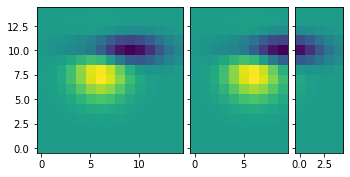

In [4]:
from matplotlib import cbook
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


fig = plt.figure(figsize=(5.5, 3.5))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 3),
                 axes_pad=0.1,
                 label_mode="L",
                 )

# demo image
Z = cbook.get_sample_data("axes_grid/bivariate_normal.npy", np_load=True)
im1 = Z
im2 = Z[:, :10]
im3 = Z[:, 10:]
vmin, vmax = Z.min(), Z.max()
for ax, im in zip(grid, [im1, im2, im3]):
    ax.imshow(im, origin="lower", vmin=vmin, vmax=vmax)

plt.show()

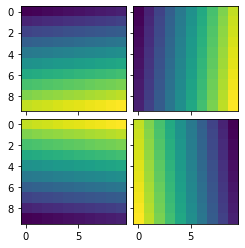

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

im1 = np.arange(100).reshape((10, 10))
im2 = im1.T
im3 = np.flipud(im1)
im4 = np.fliplr(im2)

fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [im1, im2, im3, im4]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

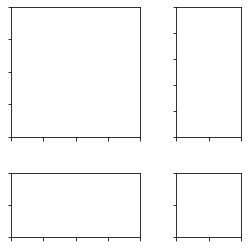

In [6]:
import mpl_toolkits.axes_grid1.axes_size as Size
from mpl_toolkits.axes_grid1 import Divider
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(5.5, 4))

# the rect parameter will be ignore as we will set axes_locator
rect = (0.1, 0.1, 0.8, 0.8)
ax = [fig.add_axes(rect, label="%d" % i) for i in range(4)]


horiz = [Size.AxesX(ax[0]), Size.Fixed(.5), Size.AxesX(ax[1])]
vert = [Size.AxesY(ax[0]), Size.Fixed(.5), Size.AxesY(ax[2])]

# divide the axes rectangle into grid whose size is specified by horiz * vert
divider = Divider(fig, rect, horiz, vert, aspect=False)


ax[0].set_axes_locator(divider.new_locator(nx=0, ny=0))
ax[1].set_axes_locator(divider.new_locator(nx=2, ny=0))
ax[2].set_axes_locator(divider.new_locator(nx=0, ny=2))
ax[3].set_axes_locator(divider.new_locator(nx=2, ny=2))

ax[0].set_xlim(0, 2)
ax[1].set_xlim(0, 1)

ax[0].set_ylim(0, 1)
ax[2].set_ylim(0, 2)

divider.set_aspect(1.)

for ax1 in ax:
    ax1.tick_params(labelbottom=False, labelleft=False)

plt.show()

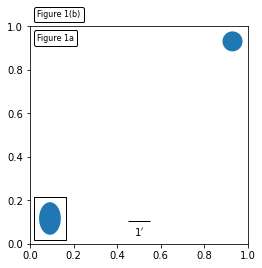

In [7]:
import matplotlib.pyplot as plt


def draw_text(ax):
    """
    Draw two text-boxes, anchored by different corners to the upper-left
    corner of the figure.
    """
    from matplotlib.offsetbox import AnchoredText
    at = AnchoredText("Figure 1a",
                      loc='upper left', prop=dict(size=8), frameon=True,
                      )
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)

    at2 = AnchoredText("Figure 1(b)",
                       loc='lower left', prop=dict(size=8), frameon=True,
                       bbox_to_anchor=(0., 1.),
                       bbox_transform=ax.transAxes
                       )
    at2.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at2)


def draw_circle(ax):
    """
    Draw a circle in axis coordinates
    """
    from mpl_toolkits.axes_grid1.anchored_artists import AnchoredDrawingArea
    from matplotlib.patches import Circle
    ada = AnchoredDrawingArea(20, 20, 0, 0,
                              loc='upper right', pad=0., frameon=False)
    p = Circle((10, 10), 10)
    ada.da.add_artist(p)
    ax.add_artist(ada)


def draw_ellipse(ax):
    """
    Draw an ellipse of width=0.1, height=0.15 in data coordinates
    """
    from mpl_toolkits.axes_grid1.anchored_artists import AnchoredEllipse
    ae = AnchoredEllipse(ax.transData, width=0.1, height=0.15, angle=0.,
                         loc='lower left', pad=0.5, borderpad=0.4,
                         frameon=True)

    ax.add_artist(ae)


def draw_sizebar(ax):
    """
    Draw a horizontal bar with length of 0.1 in data coordinates,
    with a fixed label underneath.
    """
    from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
    asb = AnchoredSizeBar(ax.transData,
                          0.1,
                          r"1$^{\prime}$",
                          loc='lower center',
                          pad=0.1, borderpad=0.5, sep=5,
                          frameon=False)
    ax.add_artist(asb)


ax = plt.gca()
ax.set_aspect(1.)

draw_text(ax)
draw_circle(ax)
draw_ellipse(ax)
draw_sizebar(ax)

plt.show()

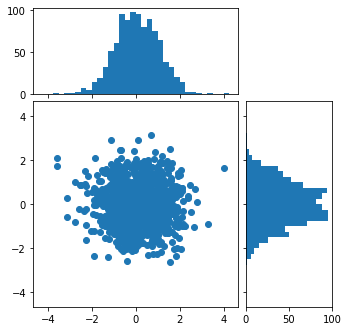

<function matplotlib.axes._axes.Axes.hist(self, x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Fixing random state for reproducibility
np.random.seed(19680801)

# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)


fig, ax = plt.subplots(figsize=(5.5, 5.5))

# the scatter plot:
ax.scatter(x, y)

# Set aspect of the main axes.
ax.set_aspect(1.)

# create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

# now determine nice limits by hand:
binwidth = 0.25
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
lim = (int(xymax/binwidth) + 1)*binwidth

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal')

# the xaxis of ax_histx and yaxis of ax_histy are shared with ax,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

ax_histx.set_yticks([0, 50, 100])
ax_histy.set_xticks([0, 50, 100])

plt.show()

#############################################################################
#
# ------------
#
# References
# """"""""""
#
# The use of the following functions, methods and classes is shown
# in this example:

import matplotlib
import mpl_toolkits
mpl_toolkits.axes_grid1.axes_divider.make_axes_locatable
matplotlib.axes.Axes.set_aspect
matplotlib.axes.Axes.scatter
matplotlib.axes.Axes.hist

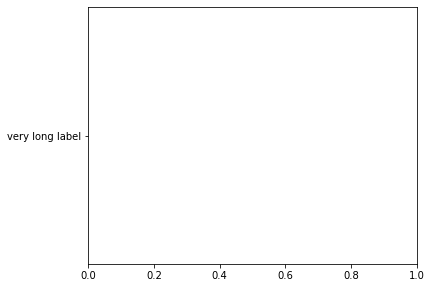

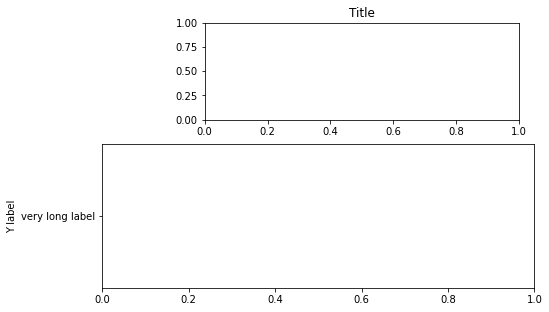

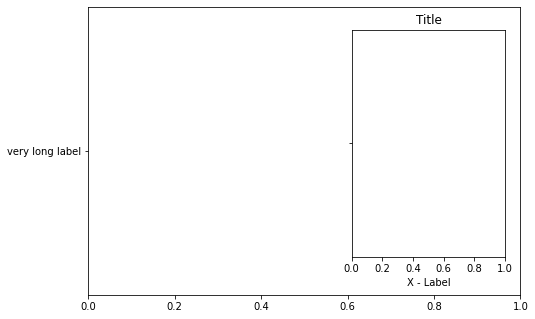

In [9]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable


plt.figure()
ax = plt.axes([0, 0, 1, 1])

ax.set_yticks([0.5])
ax.set_yticklabels(["very long label"])

make_axes_area_auto_adjustable(ax)

###############################################################################


plt.figure()
ax1 = plt.axes([0, 0, 1, 0.5])
ax2 = plt.axes([0, 0.5, 1, 0.5])

ax1.set_yticks([0.5])
ax1.set_yticklabels(["very long label"])
ax1.set_ylabel("Y label")

ax2.set_title("Title")

make_axes_area_auto_adjustable(ax1, pad=0.1, use_axes=[ax1, ax2])
make_axes_area_auto_adjustable(ax2, pad=0.1, use_axes=[ax1, ax2])

###############################################################################


fig = plt.figure()
ax1 = plt.axes([0, 0, 1, 1])
divider = make_axes_locatable(ax1)

ax2 = divider.new_horizontal("100%", pad=0.3, sharey=ax1)
ax2.tick_params(labelleft=False)
fig.add_axes(ax2)

divider.add_auto_adjustable_area(use_axes=[ax1], pad=0.1,
                                 adjust_dirs=["left"])
divider.add_auto_adjustable_area(use_axes=[ax2], pad=0.1,
                                 adjust_dirs=["right"])
divider.add_auto_adjustable_area(use_axes=[ax1, ax2], pad=0.1,
                                 adjust_dirs=["top", "bottom"])

ax1.set_yticks([0.5])
ax1.set_yticklabels(["very long label"])

ax2.set_title("Title")
ax2.set_xlabel("X - Label")

plt.show()

<IPython.core.display.Javascript object>


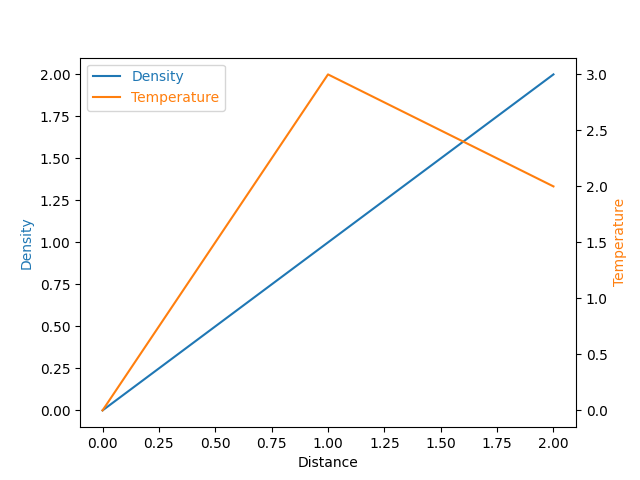

In [25]:
%matplotlib notebook
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt

host = host_subplot(111)

par = host.twinx()

host.set_xlabel("Distance")
host.set_ylabel("Density")
par.set_ylabel("Temperature")

p1, = host.plot([0, 1, 2], [0, 1, 2], label="Density")
p2, = par.plot([0, 1, 2], [0, 3, 2], label="Temperature")

leg = plt.legend()

host.yaxis.get_label().set_color(p1.get_color())
leg.texts[0].set_color(p1.get_color())

par.yaxis.get_label().set_color(p2.get_color())
leg.texts[1].set_color(p2.get_color())

plt.show()

<IPython.core.display.Javascript object>


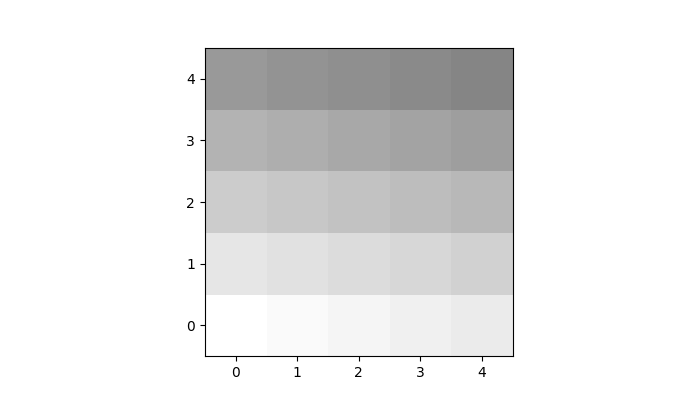

In [24]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.axisartist.grid_helper_curvelinear import (
    GridHelperCurveLinear)
from mpl_toolkits.axisartist.grid_finder import (
    ExtremeFinderSimple, MaxNLocator)
from mpl_toolkits.axisartist.axislines import Axes


def curvelinear_test1(fig):
    """Grid for custom transform."""

    def tr(x, y):
        sgn = np.sign(x)
        x, y = np.abs(np.asarray(x)), np.asarray(y)
        return sgn*x**.5, y

    def inv_tr(x, y):
        sgn = np.sign(x)
        x, y = np.asarray(x), np.asarray(y)
        return sgn*x**2, y

    grid_helper = GridHelperCurveLinear(
        (tr, inv_tr),
        extreme_finder=ExtremeFinderSimple(20, 20),
        # better tick density
        grid_locator1=MaxNLocator(nbins=6), grid_locator2=MaxNLocator(nbins=6))

    ax1 = fig.add_subplot( )
    # ax1 will have a ticks and gridlines defined by the given
    # transform (+ transData of the Axes). Note that the transform of the Axes
    # itself (i.e., transData) is not affected by the given transform.

    ax1.imshow(np.arange(25).reshape(5, 5),
               vmax=50, cmap=plt.cm.gray_r, origin="lower")


if __name__ == "__main__":
    fig = plt.figure(figsize=(7, 4))
    curvelinear_test1(fig)
    plt.show()

<IPython.core.display.Javascript object>


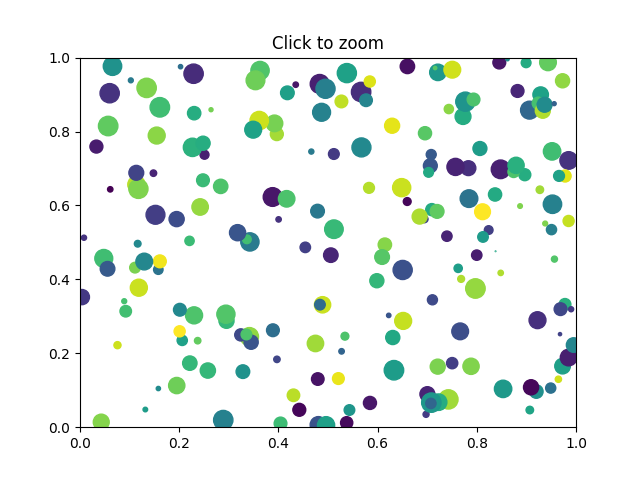

<IPython.core.display.Javascript object>


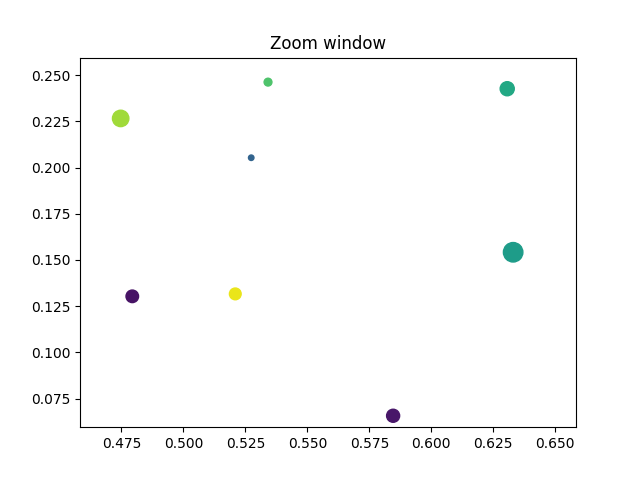

In [23]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np



# Fixing random state for reproducibility
np.random.seed(19680801)

figsrc, axsrc = plt.subplots()
figzoom, axzoom = plt.subplots()
axsrc.set(xlim=(0, 1), ylim=(0, 1), autoscale_on=False,
          title='Click to zoom')
axzoom.set(xlim=(0.45, 0.55), ylim=(0.4, 0.6), autoscale_on=False,
           title='Zoom window')

x, y, s, c = np.random.rand(4, 200)
s *= 200

axsrc.scatter(x, y, s, c)
axzoom.scatter(x, y, s, c)


def on_press(event):
    if event.button != 1:
        return
    x, y = event.xdata, event.ydata
    axzoom.set_xlim(x - 0.1, x + 0.1)
    axzoom.set_ylim(y - 0.1, y + 0.1)
    figzoom.canvas.draw()

figsrc.canvas.mpl_connect('button_press_event', on_press)
plt.show()

<IPython.core.display.Javascript object>


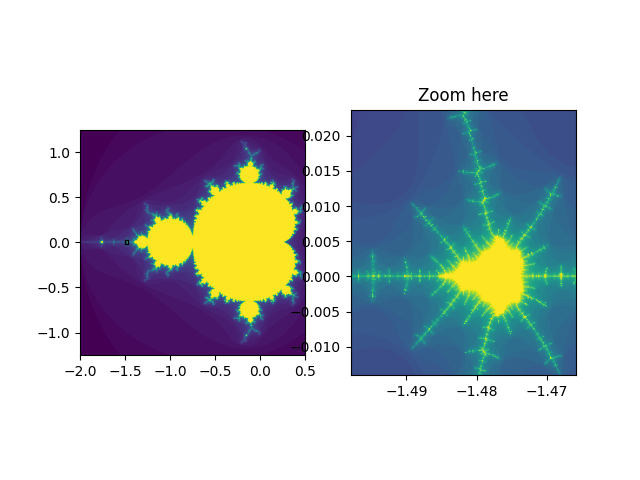

In [27]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


# We just subclass Rectangle so that it can be called with an Axes
# instance, causing the rectangle to update its shape to match the
# bounds of the Axes
class UpdatingRect(Rectangle):
    def __call__(self, ax):
        self.set_bounds(*ax.viewLim.bounds)
        ax.figure.canvas.draw_idle()


# A class that will regenerate a fractal set as we zoom in, so that you
# can actually see the increasing detail.  A box in the left panel will show
# the area to which we are zoomed.
class MandelbrotDisplay:
    def __init__(self, h=500, w=500, niter=50, radius=2., power=2):
        self.height = h
        self.width = w
        self.niter = niter
        self.radius = radius
        self.power = power

    def compute_image(self, xstart, xend, ystart, yend):
        self.x = np.linspace(xstart, xend, self.width)
        self.y = np.linspace(ystart, yend, self.height).reshape(-1, 1)
        c = self.x + 1.0j * self.y
        threshold_time = np.zeros((self.height, self.width))
        z = np.zeros(threshold_time.shape, dtype=complex)
        mask = np.ones(threshold_time.shape, dtype=bool)
        for i in range(self.niter):
            z[mask] = z[mask]**self.power + c[mask]
            mask = (np.abs(z) < self.radius)
            threshold_time += mask
        return threshold_time

    def ax_update(self, ax):
        ax.set_autoscale_on(False)  # Otherwise, infinite loop
        # Get the number of points from the number of pixels in the window
        self.width, self.height = \
            np.round(ax.patch.get_window_extent().size).astype(int)
        # Get the range for the new area
        vl = ax.viewLim
        extent = vl.x0, vl.x1, vl.y0, vl.y1
        # Update the image object with our new data and extent
        im = ax.images[-1]
        im.set_data(self.compute_image(*extent))
        im.set_extent(extent)
        ax.figure.canvas.draw_idle()


md = MandelbrotDisplay()
Z = md.compute_image(-2., 0.5, -1.25, 1.25)

fig1, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(Z, origin='lower',
           extent=(md.x.min(), md.x.max(), md.y.min(), md.y.max()))
ax2.imshow(Z, origin='lower',
           extent=(md.x.min(), md.x.max(), md.y.min(), md.y.max()))

rect = UpdatingRect(
    [0, 0], 0, 0, facecolor='none', edgecolor='black', linewidth=1.0)
rect.set_bounds(*ax2.viewLim.bounds)
ax1.add_patch(rect)

# Connect for changing the view limits
ax2.callbacks.connect('xlim_changed', rect)
ax2.callbacks.connect('ylim_changed', rect)

ax2.callbacks.connect('xlim_changed', md.ax_update)
ax2.callbacks.connect('ylim_changed', md.ax_update)
ax2.set_title("Zoom here")

plt.show()

<IPython.core.display.Javascript object>


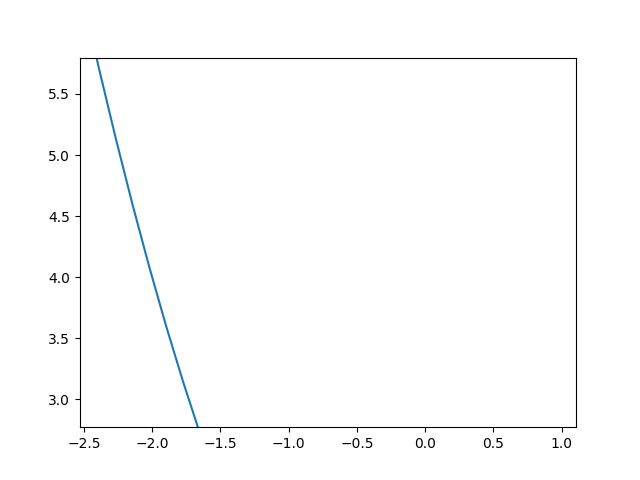

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


def update_title(axes):
    axes.set_title(datetime.now())
    axes.figure.canvas.draw()

fig, ax = plt.subplots()

x = np.linspace(-3, 3)
ax.plot(x, x ** 2)

# Create a new timer object. Set the interval to 100 milliseconds
# (1000 is default) and tell the timer what function should be called.
timer = fig.canvas.new_timer(interval=100)
timer.add_callback(update_title, ax)
# timer.start()

# Or could start the timer on first figure draw:
# def start_timer(event):
#     timer.start()
#     fig.canvas.mpl_disconnect(drawid)
# drawid = fig.canvas.mpl_connect('draw_event', start_timer)

plt.show()

<IPython.core.display.Javascript object>


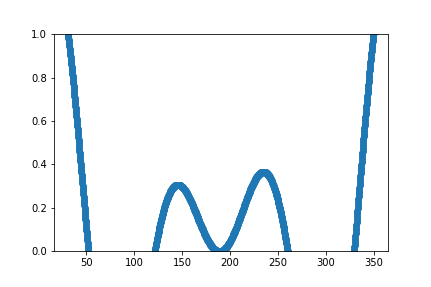

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# A class that will downsample the data and recompute when zoomed.
class DataDisplayDownsampler:
    def __init__(self, xdata, ydata):
        self.origYData = ydata
        self.origXData = xdata
        self.max_points = 50
        self.delta = xdata[-1] - xdata[0]

    def downsample(self, xstart, xend):
        # get the points in the view range
        mask = (self.origXData > xstart) & (self.origXData < xend)
        # dilate the mask by one to catch the points just outside
        # of the view range to not truncate the line
        mask = np.convolve([1, 1, 1], mask, mode='same').astype(bool)
        # sort out how many points to drop
        ratio = max(np.sum(mask) // self.max_points, 1)

        # mask data
        xdata = self.origXData[mask]
        ydata = self.origYData[mask]

        # downsample data
        xdata = xdata[::ratio]
        ydata = ydata[::ratio]

        print("using {} of {} visible points".format(len(ydata), np.sum(mask)))

        return xdata, ydata

    def update(self, ax):
        # Update the line
        lims = ax.viewLim
        if abs(lims.width - self.delta) > 1e-8:
            self.delta = lims.width
            xstart, xend = lims.intervalx
            self.line.set_data(*self.downsample(xstart, xend))
            ax.figure.canvas.draw_idle()


# Create a signal
xdata = np.linspace(16, 365, (365-16)*4)
ydata = np.sin(2*np.pi*xdata/153) + np.cos(2*np.pi*xdata/127)

d = DataDisplayDownsampler(xdata, ydata)

fig, ax = plt.subplots()

# Hook up the line
d.line, = ax.plot(xdata, ydata, 'o-')
ax.set_autoscale_on(False)  # Otherwise, infinite loop

# Connect for changing the view limits
ax.callbacks.connect('xlim_changed', d.update)
ax.set_xlim(16, 365)
plt.show()

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt


def on_press(event):
    print('press', event.key)
    sys.stdout.flush()
    if event.key == 'x':
        visible = xl.get_visible()
        xl.set_visible(not visible)
        fig.canvas.draw()


# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

fig.canvas.mpl_connect('key_press_event', on_press)

ax.plot(np.random.rand(12), np.random.rand(12), 'go')
xl = ax.set_xlabel('easy come, easy go')
ax.set_title('Press a key')
plt.show()

<IPython.core.display.Javascript object>


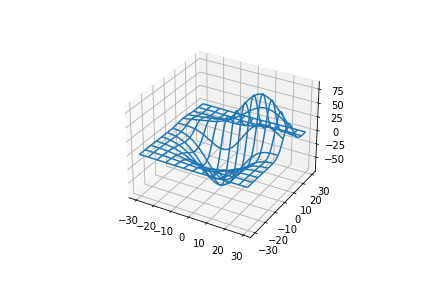

In [24]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

<IPython.core.display.Javascript object>


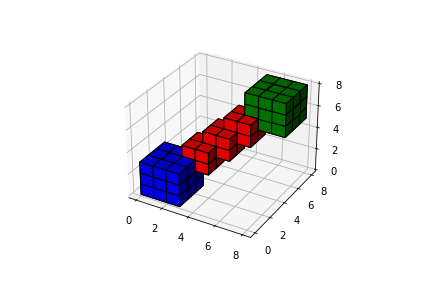

In [25]:
import matplotlib.pyplot as plt
import numpy as np


# prepare some coordinates
x, y, z = np.indices((8, 8, 8))

# draw cuboids in the top left and bottom right corners, and a link between
# them
cube1 = (x < 3) & (y < 3) & (z < 3)
cube2 = (x >= 5) & (y >= 5) & (z >= 5)
link = abs(x - y) + abs(y - z) + abs(z - x) <= 2

# combine the objects into a single boolean array
voxels = cube1 | cube2 | link

# set the colors of each object
colors = np.empty(voxels.shape, dtype=object)
colors[link] = 'red'
colors[cube1] = 'blue'
colors[cube2] = 'green'

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxels, facecolors=colors, edgecolor='k')

plt.show()

In [29]:
%matplotlib notebook
import itertools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def data_gen():
    for cnt in itertools.count():
        t = cnt / 10
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, interval=10, init_func=init)
plt.show()

<IPython.core.display.Javascript object>

In [31]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)
# Fixing bin edges
HIST_BINS = np.linspace(-4, 4, 100)

# histogram our data with numpy
data = np.random.randn(1000)
n, _ = np.histogram(data, HIST_BINS)

###############################################################################
# To animate the histogram, we need an ``animate`` function, which generates
# a random set of numbers and updates the heights of rectangles. We utilize a
# python closure to track an instance of `.BarContainer` whose `.Rectangle`
# patches we shall update.


def prepare_animation(bar_container):

    def animate(frame_number):
        # simulate new data coming in
        data = np.random.randn(1000)
        n, _ = np.histogram(data, HIST_BINS)
        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    return animate

###############################################################################
# Using :func:`~matplotlib.pyplot.hist` allows us to get an instance of
# `.BarContainer`, which is a collection of `.Rectangle` instances. Calling
# ``prepare_animation`` will define ``animate`` function working with supplied
# `.BarContainer`, all this is used to setup `.FuncAnimation`.

fig, ax = plt.subplots()
_, _, bar_container = ax.hist(data, HIST_BINS, lw=1,
                              ec="yellow", fc="green", alpha=0.5)
ax.set_ylim(top=55)  # set safe limit to ensure that all data is visible.

ani = animation.FuncAnimation(fig, prepare_animation(bar_container), 50,
                              repeat=False, blit=True)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


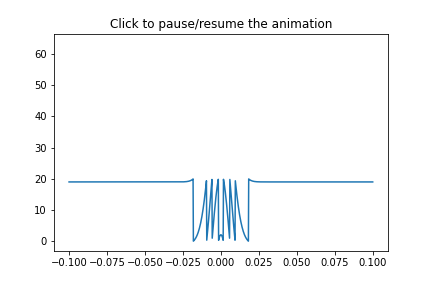

In [32]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np


class PauseAnimation:
    def __init__(self):
        fig, ax = plt.subplots()
        ax.set_title('Click to pause/resume the animation')
        x = np.linspace(-0.1, 0.1, 1000)

        # Start with a normal distribution
        self.n0 = (1.0 / ((4 * np.pi * 2e-4 * 0.1) ** 0.5)
                   * np.exp(-x ** 2 / (4 * 2e-4 * 0.1)))
        self.p, = ax.plot(x, self.n0)

        self.animation = animation.FuncAnimation(
            fig, self.update, frames=200, interval=50, blit=True)
        self.paused = False

        fig.canvas.mpl_connect('button_press_event', self.toggle_pause)

    def toggle_pause(self, *args, **kwargs):
        if self.paused:
            self.animation.resume()
        else:
            self.animation.pause()
        self.paused = not self.paused

    def update(self, i):
        self.n0 += i / 100 % 5
        self.p.set_ydata(self.n0 % 20)
        return (self.p,)


pa = PauseAnimation()
plt.show()

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


# Create new Figure with black background
fig = plt.figure(figsize=(8, 8), facecolor='black')

# Add a subplot with no frame
ax = plt.subplot(frameon=False)

# Generate random data
data = np.random.uniform(0, 1, (64, 75))
X = np.linspace(-1, 1, data.shape[-1])
G = 1.5 * np.exp(-4 * X ** 2)

# Generate line plots
lines = []
for i in range(len(data)):
    # Small reduction of the X extents to get a cheap perspective effect
    xscale = 1 - i / 200.
    # Same for linewidth (thicker strokes on bottom)
    lw = 1.5 - i / 100.0
    line, = ax.plot(xscale * X, i + G * data[i], color="w", lw=lw)
    lines.append(line)

# Set y limit (or first line is cropped because of thickness)
ax.set_ylim(-1, 70)

# No ticks
ax.set_xticks([])
ax.set_yticks([])

# 2 part titles to get different font weights
ax.text(0.5, 1.0, "MATPLOTLIB ", transform=ax.transAxes,
        ha="right", va="bottom", color="w",
        family="sans-serif", fontweight="light", fontsize=16)
ax.text(0.5, 1.0, "UNCHAINED", transform=ax.transAxes,
        ha="left", va="bottom", color="w",
        family="sans-serif", fontweight="bold", fontsize=16)


def update(*args):
    # Shift all data to the right
    data[:, 1:] = data[:, :-1]

    # Fill-in new values
    data[:, 0] = np.random.uniform(0, 1, len(data))

    # Update data
    for i in range(len(data)):
        lines[i].set_ydata(i + G * data[i])

    # Return modified artists
    return lines

# Construct the animation, using the update function as the animation director.
anim = animation.FuncAnimation(fig, update, interval=10)
plt.show()

<IPython.core.display.Javascript object>